<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h4 style="padding: 10px;
              color:white;">Project : Human Activity Recognition using Machine Learning

    
</h4>
</div>
    
</center>

## Team: Data Dynasty

Nikita Gill |
Saurabh Verma |
Abhijit Wayal |
Janhavi Kharmale |
Neha Satpute

## Overview of Our Approach: Steps and Objectives:


<div class="alert alert-block alert-info">
  <ul style="list-style-type: disc;">
    <li> Preprocessed the data.</li>
    <li> Prepared the dataset for model fitting.</li>
    <li> Applied both Standard and Min-Max scaling techniques.</li>
    <li>Utilized a label encoder to assign labels to the target data.</li>
    <li>Evaluated accuracy and F1-score for both scaled and unscaled data using various models.</li>
    <li>Conducted hyperparameter tuning through grid search.</li>
    <li>Compared the models based on the accuracy metric.</li>
    <li>Selected the best model and provided the rationale behind the choice.</li>
  </ul>
</div>

# Importing necessary packages 

In [6]:
import numpy as np
import pandas as pd
import warnings
import itertools
warnings.filterwarnings("ignore") 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Loading the dataset

In [2]:
train = pd.read_csv('cleaned_train.csv')
test = pd.read_csv('cleaned_test.csv')

# Explore the dataset

In [3]:
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [4]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


# Making Dataset for Model

This code is preparing data for a machine learning model. It first separates the training dataset into two parts: X_train, which contains the features (independent variables) for training, and y_train, which contains the corresponding target labels (dependent variable). Similarly, it does the same for the test dataset, creating X_test for test features and y_test for test labels. The code drops the 'subject' and 'Activity' columns from both the training and test data, assuming that 'subject' is an identifier or irrelevant feature, and 'Activity' is the target variable to predict.

In [6]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Modeling with our dataset

## Standard and Min-Max Scaling

Standard Scaling (also known as Z-score normalization) is a data preprocessing technique used to transform numerical data into a standard distribution with a mean of 0 and a standard deviation of 1. It helps in comparing different features on the same scale, making them directly comparable.

Min-Max Scaling, on the other hand, scales numerical data to a specific range, typically between 0 and 1. It preserves the relative relationships between data points while ensuring that all values are within the desired range. This technique is useful when you want to maintain the original proportions of data but constrain them to a specific interval.

In [7]:
# Standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Test MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

## Labeling the target data

This preprocessing step is typically applied when dealing with categorical target variables, transforming them into numerical format for machine learning algorithms to work with. It's essential to use the same LabelEncoder instance for both the training and testing data to ensure consistency in encoding.

In [8]:
# Label encoding for target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

## Comparing accuracy for scaled and unscaled data for different models

This code defines a function, run_models, which runs multiple machine learning models on both unscaled and scaled data, comparing their accuracy. It then outputs the accuracy scores and classification reports for each model. The models include logistic regression, decision trees, Naive Bayes, K-Nearest Neighbors, random forests, and others. This allows for a side-by-side comparison of how well these models perform with and without data scaling (standard scaling and min-max scaling).

In [7]:
# Program to run multiple models through sklearn
# Default settings output accuracy and classification report
# Compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [
        ('Default Logistic Regression', LogisticRegression()),
        ('Logistic Regression (Lasso)', LogisticRegression(penalty='l1', solver='liblinear')),
        ('Logistic Regression (Ridge)', LogisticRegression(penalty='l2', solver='liblinear')),
        ('Logistic Regression (Elastic Net)', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')),
        ('Decision Tree', DecisionTreeClassifier()),        
        ('Naive Bayes', GaussianNB()),
        ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
        ('Random Forest', RandomForestClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', XGBClassifier()),
        ('SVM', SVC()),
        ('MLP Classifier', MLPClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier())
    ]

    for name, model in models:
        # Unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # MinMax scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)

        # Accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred), 5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled), 5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled), 5)

        # Output of the model
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("                            -----------------------------------               \n")
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
            print("                            -----------------------------------               \n")
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))
            print("                            -----------------------------------               \n")

## Running all models

In [8]:
#run all models
run_models(X_train, y_train, X_test, y_test)

Default Logistic Regression:
---------------------------------------------------------------
Accuracy: 0.95792
Accuracy w/Scaled Data (ss): 0.95351
Accuracy w/Scaled Data (mm): 0.95351

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.96      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

                            -----------------------------------               

Logistic Regression (Lasso):
---------------------------------------------------------------
Accuracy: 0.96233
Accuracy w/Scaled Data (ss): 0.95962
Accuracy w/Scaled D

SVM:
---------------------------------------------------------------
Accuracy: 0.95046
Accuracy w/Scaled Data (ss): 0.95182
Accuracy w/Scaled Data (mm): 0.94808

Classification Report (ss):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.94      0.90      0.92       491
           2       0.92      0.95      0.93       532
           3       0.96      0.97      0.97       496
           4       0.98      0.92      0.95       420
           5       0.93      0.97      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

                            -----------------------------------               

MLP Classifier:
---------------------------------------------------------------
Accuracy: 0.94164
Accuracy w/Scaled Data (ss): 0.94062
Accuracy w/Scaled Data (mm): 0.96301

Classificatio

## Comparative analysis of Classification Models with Data Scaling

This code defines a function, run_models, which runs various machine learning models on both unscaled and scaled data, comparing their F1 scores. It then outputs the F1 scores and classification reports for each model. The models include logistic regression, decision trees, support vector machines, random forests, and others. It also generates a bar graph to visualize the F1 score comparison between unscaled data, standard scaled data, and min-max scaled data. This allows for an assessment of model performance under different scaling conditions.

In [30]:
def run_models(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [
        ('Default Logistic Regression', LogisticRegression()),
        ('Logistic Regression (Lasso)', LogisticRegression(penalty='l1', solver='liblinear')),
        ('Logistic Regression (Ridge)', LogisticRegression(penalty='l2', solver='liblinear')),
        ('Logistic Regression (Elastic Net)', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')),
        ('Decision Tree', DecisionTreeClassifier()),
        ('SVM', SVC()),
        ('Random Forest', RandomForestClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('MLP Classifier', MLPClassifier())
    ]

    for name, model in models:
        # Unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # MinMax scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)

        # F1 scores
        f1_score = round(metrics.f1_score(y_test, y_pred, average='macro'), 5)
        f1_score_scaled = round(metrics.f1_score(y_test, y_pred_scaled, average='macro'), 5)
        f1_score_mm_scaled = round(metrics.f1_score(y_test, y_pred_mm_scaled, average='macro'), 5)


        # Output of the model
        print(name + ':')
        print("---------------------------------------------------------------")
        print("F1 Score:", f1_score)
        print("F1 Score w/Scaled Data (ss):", f1_score_scaled)
        print("F1 Score w/Scaled Data (mm):", f1_score_mm_scaled)

        # F1 score comparison graph
        f1_scores = [f1_score, f1_score_scaled, f1_score_mm_scaled]
        labels = ['Unscaled', 'Scaled (ss)', 'Scaled (mm)']

        plt.bar(labels, f1_scores)
        plt.xlabel('Data Scaling')
        plt.ylabel('F1 Score')
        plt.title('F1 Score Comparison')
        plt.show()

        if f1_score > f1_score_scaled and f1_score > f1_score_mm_scaled:
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
        elif f1_score_scaled > f1_score_mm_scaled:
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))

        print("                            -----------------------------------               \n")

## Running all models

Default Logistic Regression:
---------------------------------------------------------------
F1 Score: 0.95779
F1 Score w/Scaled Data (ss): 0.95323
F1 Score w/Scaled Data (mm): 0.9536


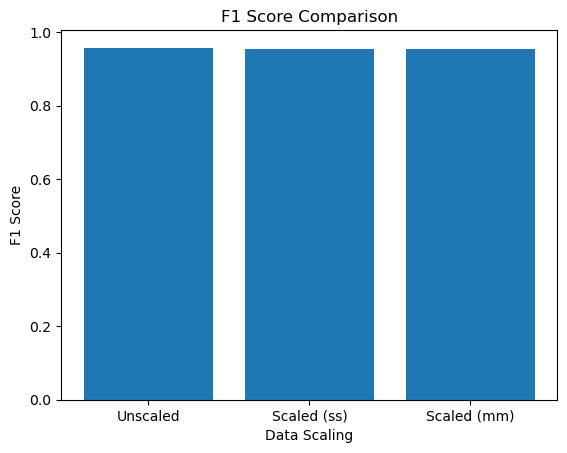


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.96      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

                            -----------------------------------               

Logistic Regression (Lasso):
---------------------------------------------------------------
F1 Score: 0.9615
F1 Score w/Scaled Data (ss): 0.96017
F1 Score w/Scaled Data (mm): 0.96149


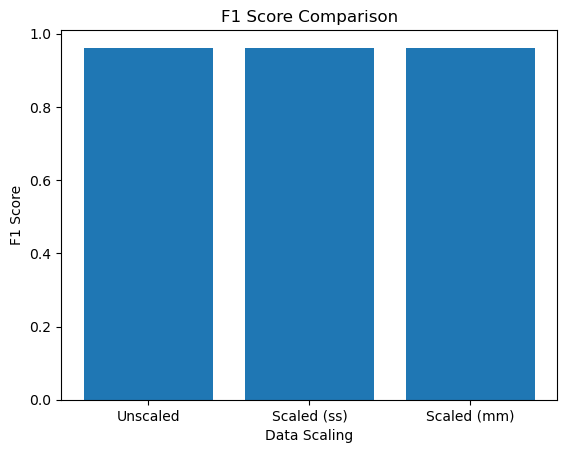


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.92       491
           2       0.90      0.97      0.93       532
           3       0.94      1.00      0.97       496
           4       1.00      0.97      0.98       420
           5       0.97      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

                            -----------------------------------               

Logistic Regression (Ridge):
---------------------------------------------------------------
F1 Score: 0.96209
F1 Score w/Scaled Data (ss): 0.96227
F1 Score w/Scaled Data (mm): 0.95958


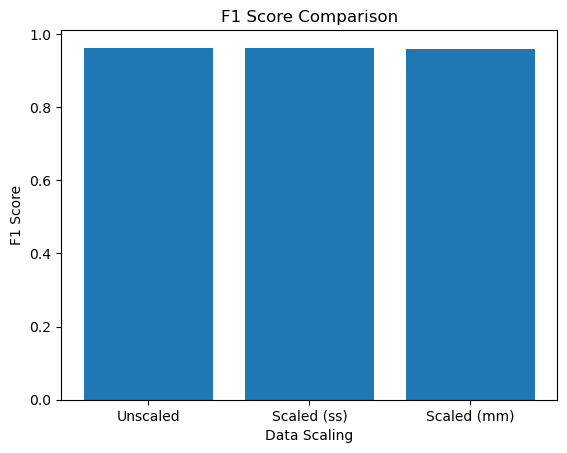


Classification Report (ss):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.96      0.87      0.92       491
           2       0.88      0.97      0.92       532
           3       0.96      1.00      0.98       496
           4       1.00      0.99      0.99       420
           5       0.99      0.96      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

                            -----------------------------------               

Logistic Regression (Elastic Net):
---------------------------------------------------------------
F1 Score: 0.96058
F1 Score w/Scaled Data (ss): 0.94491
F1 Score w/Scaled Data (mm): 0.95611


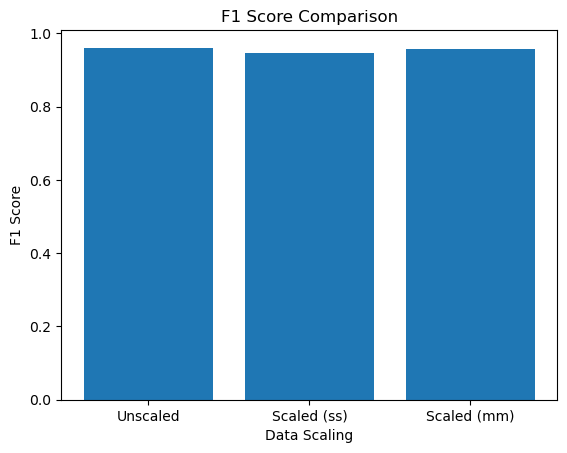


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.88      0.92       491
           2       0.90      0.97      0.94       532
           3       0.95      1.00      0.97       496
           4       0.99      0.96      0.98       420
           5       0.97      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
F1 Score: 0.86192
F1 Score w/Scaled Data (ss): 0.85714
F1 Score w/Scaled Data (mm): 0.85248


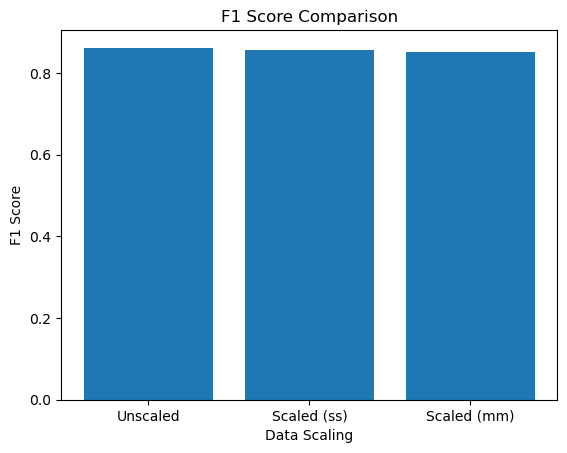


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.83      0.77      0.80       491
           2       0.80      0.85      0.82       532
           3       0.85      0.92      0.88       496
           4       0.87      0.84      0.86       420
           5       0.84      0.79      0.81       471

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947

                            -----------------------------------               

SVM:
---------------------------------------------------------------
F1 Score: 0.94991
F1 Score w/Scaled Data (ss): 0.95114
F1 Score w/Scaled Data (mm): 0.94758


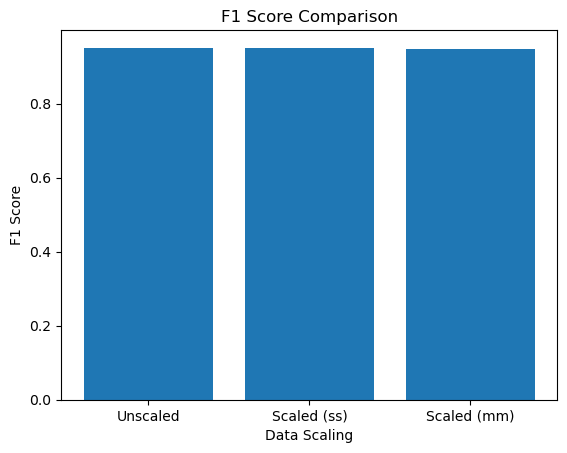


Classification Report (ss):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.94      0.90      0.92       491
           2       0.92      0.95      0.93       532
           3       0.96      0.97      0.97       496
           4       0.98      0.92      0.95       420
           5       0.93      0.97      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

                            -----------------------------------               

Random Forest:
---------------------------------------------------------------
F1 Score: 0.92891
F1 Score w/Scaled Data (ss): 0.91948
F1 Score w/Scaled Data (mm): 0.92333


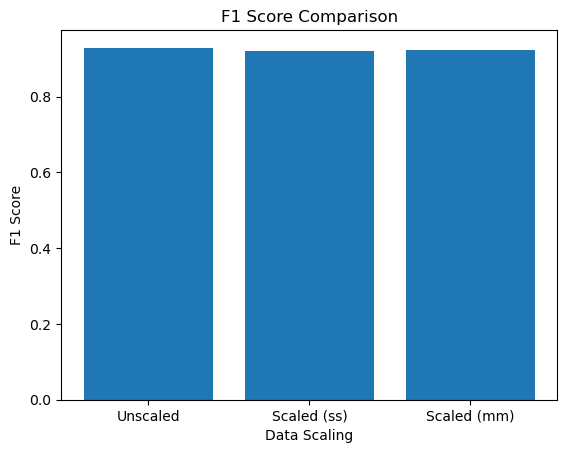


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.91      0.91       491
           2       0.91      0.92      0.91       532
           3       0.91      0.97      0.94       496
           4       0.95      0.86      0.90       420
           5       0.90      0.92      0.91       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947

                            -----------------------------------               

AdaBoost:
---------------------------------------------------------------
F1 Score: 0.36851
F1 Score w/Scaled Data (ss): 0.36851
F1 Score w/Scaled Data (mm): 0.36851


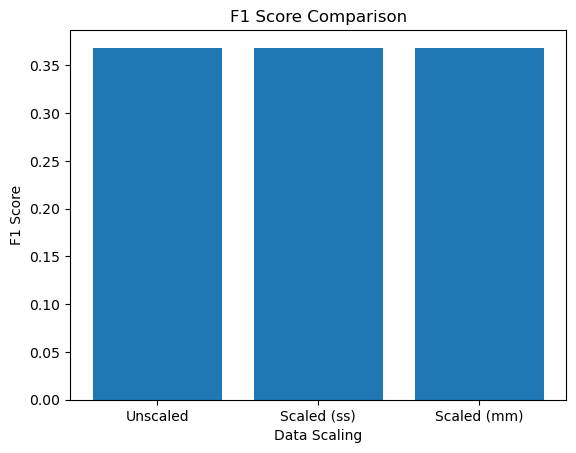


Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.00      0.00      0.00       491
           2       0.52      1.00      0.68       532
           3       0.36      1.00      0.53       496
           4       0.00      0.00      0.00       420
           5       0.00      0.00      0.00       471

    accuracy                           0.53      2947
   macro avg       0.31      0.50      0.37      2947
weighted avg       0.34      0.53      0.39      2947

                            -----------------------------------               

Gradient Boosting:
---------------------------------------------------------------
F1 Score: 0.93767
F1 Score w/Scaled Data (ss): 0.93861
F1 Score w/Scaled Data (mm): 0.938


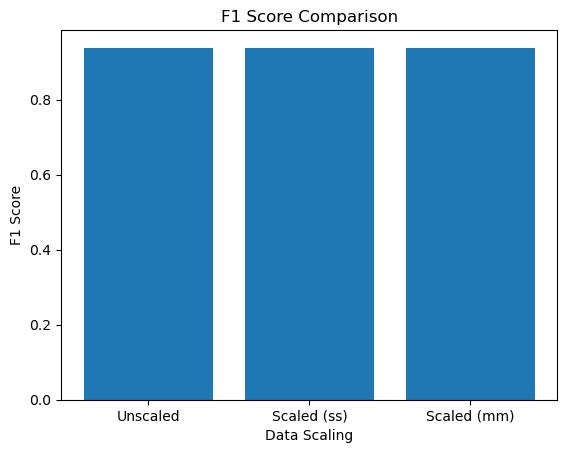


Classification Report (ss):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.86      0.89       491
           2       0.88      0.94      0.91       532
           3       0.94      0.98      0.96       496
           4       0.97      0.92      0.95       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947

                            -----------------------------------               

XGBoost:
---------------------------------------------------------------
F1 Score: 0.93828
F1 Score w/Scaled Data (ss): 0.93734
F1 Score w/Scaled Data (mm): 0.93766


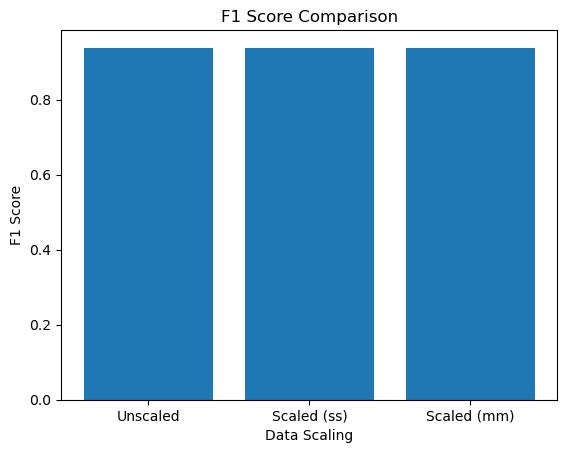


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.86      0.90       491
           2       0.89      0.95      0.92       532
           3       0.93      0.98      0.95       496
           4       0.96      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947

                            -----------------------------------               

KNN:
---------------------------------------------------------------
F1 Score: 0.89702
F1 Score w/Scaled Data (ss): 0.88053
F1 Score w/Scaled Data (mm): 0.89675


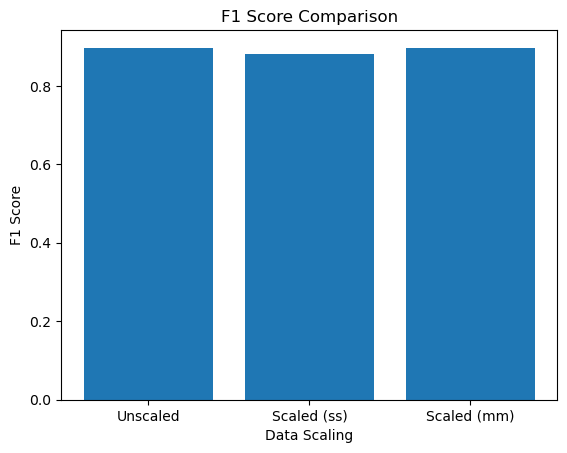


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       537
           1       0.91      0.79      0.85       491
           2       0.83      0.93      0.88       532
           3       0.85      0.98      0.91       496
           4       0.94      0.79      0.86       420
           5       0.90      0.89      0.89       471

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947

                            -----------------------------------               

Naive Bayes:
---------------------------------------------------------------
F1 Score: 0.76723
F1 Score w/Scaled Data (ss): 0.76723
F1 Score w/Scaled Data (mm): 0.76723


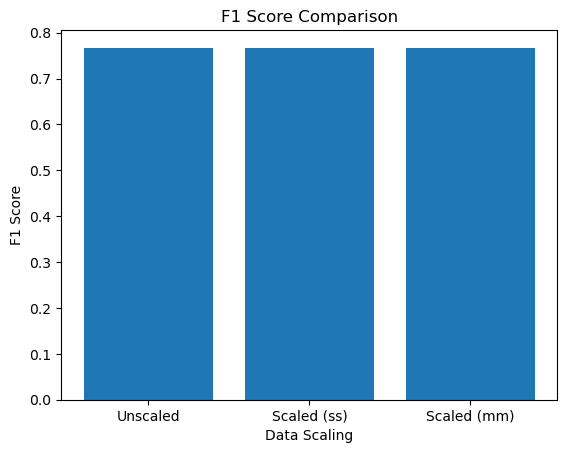


Classification Report (mm):
               precision    recall  f1-score   support

           0       0.96      0.60      0.74       537
           1       0.58      0.75      0.65       491
           2       0.80      0.86      0.83       532
           3       0.82      0.84      0.83       496
           4       0.83      0.61      0.70       420
           5       0.76      0.96      0.84       471

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947

                            -----------------------------------               

MLP Classifier:
---------------------------------------------------------------
F1 Score: 0.94347
F1 Score w/Scaled Data (ss): 0.9442
F1 Score w/Scaled Data (mm): 0.96212


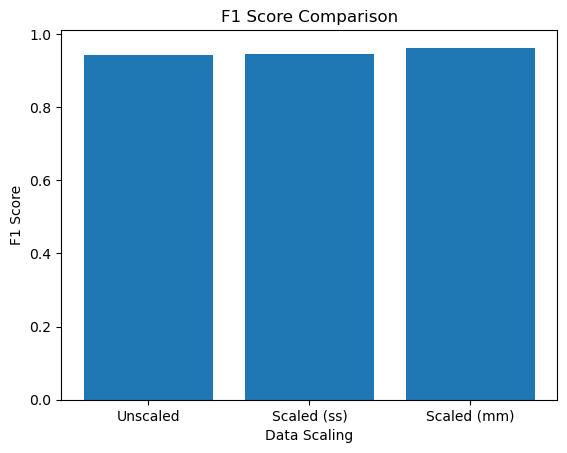


Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.94       491
           2       0.91      0.98      0.95       532
           3       0.96      0.99      0.97       496
           4       0.99      0.93      0.96       420
           5       0.94      0.97      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

                            -----------------------------------               



In [31]:
#run all models
run_models(X_train, y_train, X_test, y_test)

Since we do not have any outliers in the data, we can choose any of the scaling techniques mentioned above. If there were any outliers, we would assess and opt for the StandardScaler method for scaling.

# Running Models with Grid Search

## Labels that are useful in plotting confusion matrix

These labels represent different activities or states and could be used in various contexts, such as classifying human activities based on sensor data, monitoring user behavior, or analyzing physical activities. Each label corresponds to a specific activity or posture that we are working with in this project

In [9]:
labels = ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Making a function to plot the confusion matrix

This function is used to create a visual representation of a confusion matrix, which helps to assess the performance of a classification model. It can show how well the model correctly predicts different classes. The function takes the confusion matrix, class labels, and optional parameters for customization, such as normalization and color schemes, to create a clear and informative visualization of model performance.

In [10]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Making a function to run any model specified

This function trains a machine learning model, assesses its accuracy, and provides insights through a confusion matrix and classification report. It also visualizes the confusion matrix, making it a versatile tool for model evaluation.

In [11]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

## Making function to print the Grid Search parameters

This function summarizes key details about the best machine learning model discovered through grid search, including the model itself, its optimal hyperparameters, the number of cross-validation sets used, and its average cross-validated score.

In [12]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))

    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))

    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))

    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Done....!

==> training time:- 0:01:45.105534

Predicting test data
Done....!

==> testing time:- 0:00:00.007002

==> Accuracy:- 0.9619952494061758


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  1 427  60   0   0   3]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   4 408   8]
 [  0   0   0  23   0 448]]


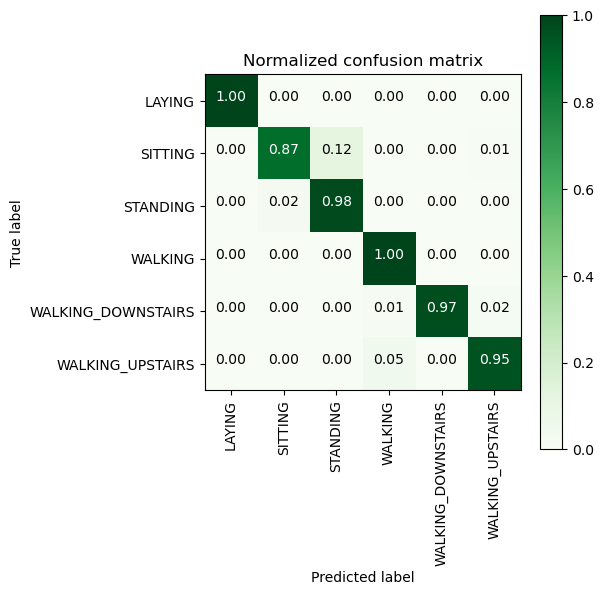

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.92       491
           2       0.90      0.98      0.94       532
           3       0.95      1.00      0.97       496
           4       1.00      0.97      0.98       420
           5       0.98      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=10.0, solver='liblinear')


==> Best parameters:
	Parameters of best estimator : {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9446432804047772


In [37]:
# Start Grid Search

parameters = {'C': [0.01, 0.1, 1.0, 10.0],
                    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model 

print_grid_search_attributes(log_reg_grid_results['model'])

## Result Summary:

In this code, a logistic regression model is fine-tuned using grid search with various hyperparameters. The parameters include the regularization strength (C), penalty type (l1, l2, elasticnet, none), and solver method (newton-cg, lbfgs, liblinear, saga). The grid search is performed with cross-validation (cv=3) and parallel processing (n_jobs=-1). 

The best-performing model is identified, with the following attributes:

##### Best Estimator: LogisticRegression(C=10.0, solver='liblinear')
##### Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
##### Number of Cross-Validation Sets: 3
##### Best Score: 0.9446432804047772 (Average Cross Validate Score)

### After training, the model achieves an accuracy of approximately 96.20% on the test data. 

# 2. KNN with Grid Search

training the model..
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Done....!

==> training time:- 0:01:29.403386

Predicting test data
Done....!

==> testing time:- 0:00:04.638106

==> Accuracy:- 0.9168646080760094


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  1 405  83   0   0   2]
 [  0  17 515   0   0   0]
 [  0   0   0 484   6   6]
 [  0   0   0  39 327  54]
 [  0   0   0  35   2 434]]


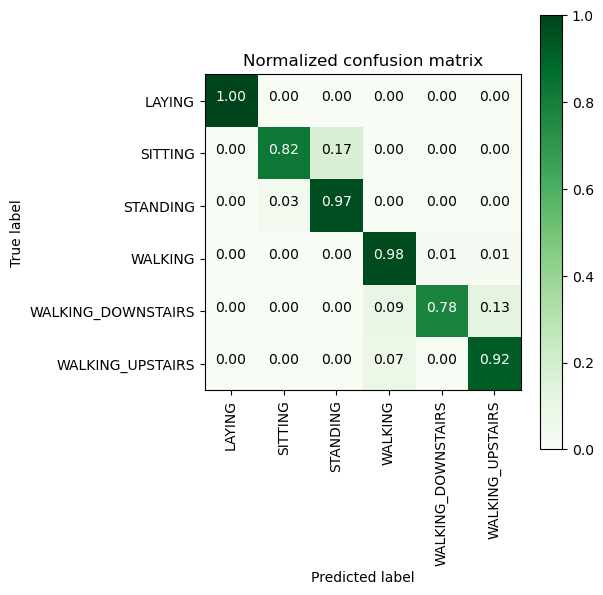

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.82      0.89       491
           2       0.86      0.97      0.91       532
           3       0.87      0.98      0.92       496
           4       0.98      0.78      0.87       420
           5       0.88      0.92      0.90       471

    accuracy                           0.92      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.92      0.92      2947



==> Best Estimator:
	KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')


==> Best parameters:
	Parameters of best estimator : {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9069680027007404


In [57]:
# Start Grid Search

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  }

knn_classifier = KNeighborsClassifier()
knn_classifier_grid = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='accuracy', cv=5, verbose = 1)
knn_classifier_grid_results =  perform_model(knn_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model 

print_grid_search_attributes(knn_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is performed for fine-tuning a K-Nearest Neighbors (KNN) classifier. The hyperparameters explored include the number of neighbors (n_neighbors), weight function (uniform or distance), and the Minkowski distance parameter (p). Grid search is conducted with 5-fold cross-validation.

The best-performing KNN classifier is identified with the following attributes:

##### Best Estimator: KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
##### Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
##### Number of Cross-Validation Sets: 5
##### Best Score: 0.9069680027007404 (Average Cross Validate Score)

### After training, the KNN classifier achieves an accuracy of approximately 91.69% on the test data. 

# 3. Decision Trees with Grid Search

training the model..
Done....!

==> training time:- 0:02:59.023371

Predicting test data
Done....!

==> testing time:- 0:00:00.006985

==> Accuracy:- 0.8696979979640312


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 371 120   0   0   0]
 [  0  62 470   0   0   0]
 [  0   0   0 452  18  26]
 [  0   0   0  13 358  49]
 [  0   0   0  62  34 375]]


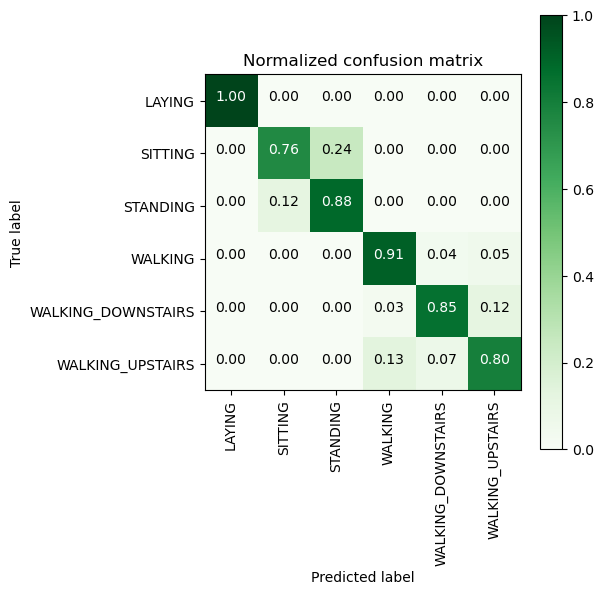

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.86      0.76      0.80       491
           2       0.80      0.88      0.84       532
           3       0.86      0.91      0.88       496
           4       0.87      0.85      0.86       420
           5       0.83      0.80      0.81       471

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=10, min_samples_split=10)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8539268487816608


In [44]:
# Start Grid Search

param_dt = {'max_depth': [2, 5, 10, 20, 30, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

dt_classifier = DecisionTreeClassifier()
dt_classifier_grid = GridSearchCV(dt_classifier,param_grid=param_dt, n_jobs=-1)
dt_classifier_grid_results = perform_model(dt_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model 

print_grid_search_attributes(dt_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is performed to fine-tune a Decision Tree classifier. The hyperparameters explored include the maximum depth of the tree (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the minimum number of samples required to be at a leaf node (min_samples_leaf). Grid search is conducted with parallel processing (n_jobs=-1).

The best-performing Decision Tree classifier is identified with the following attributes:

##### Best Estimator: DecisionTreeClassifier(max_depth=10, min_samples_split=10)
##### Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
##### Number of Cross-Validation Sets: 5
##### Best Score: 0.8539268487816608 (Average Cross Validate Score)

### After training, the Decision Tree classifier achieves an accuracy of approximately 86.97% on the test data. 

# 4. Random Forest Classifier with Grid Search

training the model..
Done....!

==> training time:- 0:16:23.669633

Predicting test data
Done....!

==> testing time:- 0:00:00.035907

==> Accuracy:- 0.9233118425517476


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 434  57   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 487   4   5]
 [  0   0   0  26 347  47]
 [  0   0   0  38   6 427]]


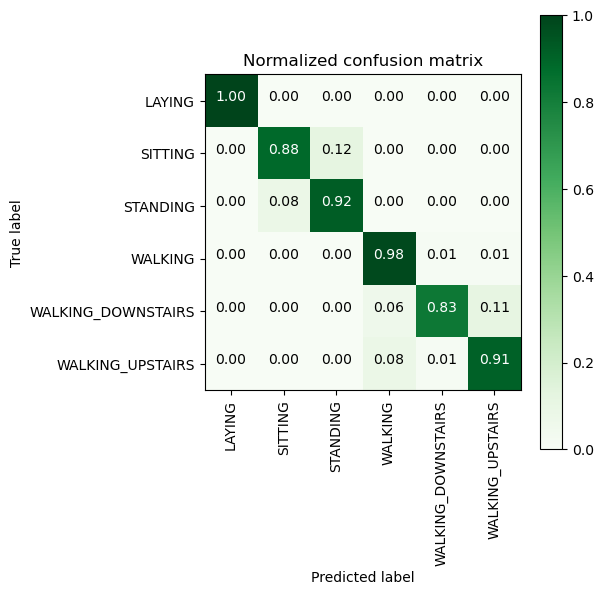

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.88      0.90       491
           2       0.90      0.92      0.91       532
           3       0.88      0.98      0.93       496
           4       0.97      0.83      0.89       420
           5       0.89      0.91      0.90       471

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=10, min_samples_split=5)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9239715682330036


In [47]:
# Start Grid Search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

rf_classifier = RandomForestClassifier()
rf_classifier_grid = GridSearchCV(rf_classifier, param_grid=param_grid, n_jobs=-1)
rf_classifier_grid_results = perform_model(rf_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model 

print_grid_search_attributes(rf_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is performed to fine-tune a Random Forest classifier. The hyperparameters explored include the number of estimators (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split an internal node (min_samples_split). Grid search is conducted with parallel processing (n_jobs=-1).

The best-performing Random Forest classifier is identified with the following attributes:

##### Best Estimator: RandomForestClassifier(max_depth=10, min_samples_split=5)
##### Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
##### Number of Cross-Validation Sets: 5
##### Best Score: 0.9239715682330036 (Average Cross Validate Score)

### After training, the Random Forest classifier achieves an accuracy of approximately 92.33% on the test data. 

# 5. XGBoosting with Grid Search

training the model..
Done....!

==> training time:- 0:05:01.138471

Predicting test data
Done....!

==> testing time:- 0:00:00.185910

==> Accuracy:- 0.9514760773668137


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 427  61   0   0   3]
 [  0  18 514   0   0   0]
 [  0   0   0 488   0   8]
 [  0   0   0   5 396  19]
 [  0   0   0  23   6 442]]


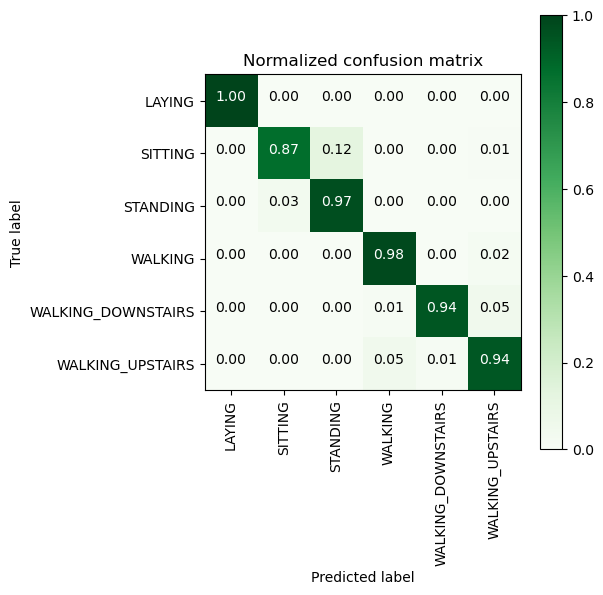

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.87      0.91       491
           2       0.89      0.97      0.93       532
           3       0.95      0.98      0.96       496
           4       0.99      0.94      0.96       420
           5       0.94      0.94      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



==> Best Estimator:
	XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constra

In [50]:
# Start Grid Search

param_grid = { 
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]}

xgb_classifier = XGBClassifier()
xgb_classifier_grid = GridSearchCV(xgb_classifier, param_grid=param_grid, n_jobs=-1, cv=5)  
xgb_classifier_grid_results = perform_model(xgb_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model

print_grid_search_attributes(xgb_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is performed to fine-tune an XGBoost classifier. The hyperparameters explored include the maximum depth of trees (max_depth) and the number of estimators (n_estimators). Grid search is conducted with parallel processing (n_jobs=-1) and 5-fold cross-validation.

The best-performing XGBoost classifier is identified with the following attributes:

#### Best Estimator: XGBClassifier(max_depth=3, n_estimators=200)
#### Best Parameters: {'max_depth': 3, 'n_estimators': 200}
#### Number of Cross-Validation Sets: 5
#### Best Score: 0.9343071722230702 (Average Cross Validate Score)

### After training, the XGBoost classifier achieves an accuracy of approximately 95.15% on the test data. 

# 6. Ada Boosting with Grid Search

training the model..
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.678 total time= 2.0min
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.545 total time= 2.0min
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.736 total time= 2.0min
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.545 total time= 2.0min
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.650 total time= 2.0min
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.680 total time= 3.9min
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.729 total time= 3.9min
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.759 total time= 3.8min
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.545 total time= 1.6min
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.790 total time= 1.4min
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.733 total time= 2.8min
[CV 2/5] EN

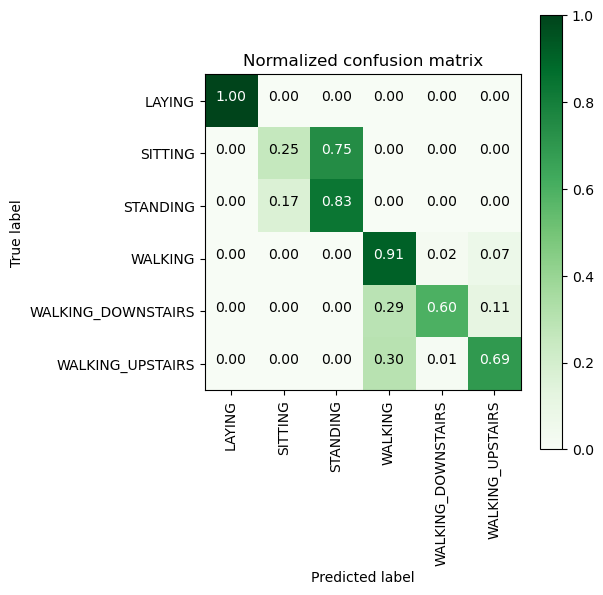

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.58      0.25      0.35       491
           2       0.55      0.83      0.66       532
           3       0.63      0.91      0.75       496
           4       0.94      0.60      0.73       420
           5       0.80      0.69      0.74       471

    accuracy                           0.72      2947
   macro avg       0.75      0.71      0.71      2947
weighted avg       0.75      0.72      0.71      2947



==> Best Estimator:
	AdaBoostClassifier(learning_rate=0.01, n_estimators=100)


==> Best parameters:
	Parameters of best estimator : {'learning_rate': 0.01, 'n_estimators': 100}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.700760554391709


In [59]:
# Start Grid Search

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]}

ada_classifier = AdaBoostClassifier()
ada_classifier_grid = GridSearchCV(ada_classifier, param_grid, scoring='accuracy', verbose = 3)
ada_classifier_grid_results = perform_model(ada_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model

print_grid_search_attributes(ada_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is conducted to optimize an AdaBoost classifier. The hyperparameters under consideration are the number of estimators (n_estimators) and the learning rate (learning_rate). The grid search is performed with 5-fold cross-validation and verbose output.

The best-performing AdaBoost classifier is identified with the following attributes:

##### Best Estimator: AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
##### Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
##### Number of Cross-Validation Sets: 5
##### Best Score: 0.700760554391709 (Average Cross-Validate Score)

### After training, the AdaBoost classifier achieves an accuracy of approximately 72.34% on the test data. 

# 7. Naive Bayes with Grid Search

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................priors=None;, score=0.648 total time=   0.0s
[CV 2/5] END .......................priors=None;, score=0.585 total time=   0.0s
[CV 3/5] END .......................priors=None;, score=0.803 total time=   0.1s
[CV 4/5] END .......................priors=None;, score=0.714 total time=   0.1s
[CV 5/5] END .......................priors=None;, score=0.682 total time=   0.1s
[CV 1/5] END ...................priors=[0.1, 0.9];, score=nan total time=   0.0s
[CV 2/5] END ...................priors=[0.1, 0.9];, score=nan total time=   0.0s
[CV 3/5] END ...................priors=[0.1, 0.9];, score=nan total time=   0.0s
[CV 4/5] END ...................priors=[0.1, 0.9];, score=nan total time=   0.0s
[CV 5/5] END ...................priors=[0.1, 0.9];, score=nan total time=   0.0s
[CV 1/5] END ...................priors=[0.2, 0.8];, score=nan total time=   0.0s
[CV 2/5] END ...............

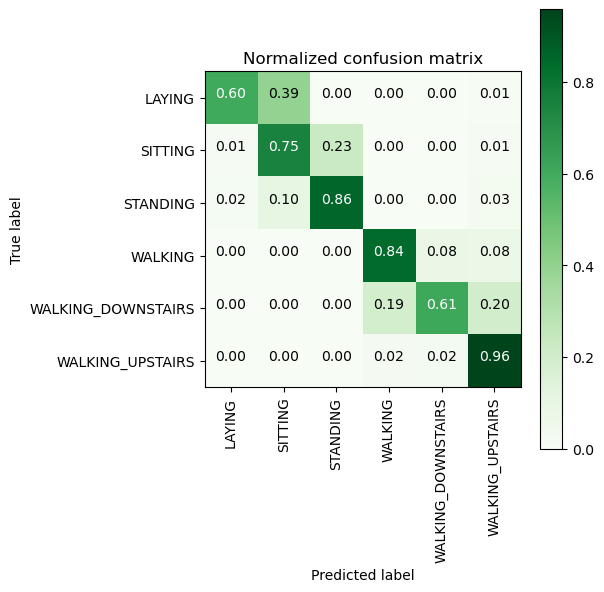

****************| Classifiction Report |****************
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       537
           1       0.58      0.75      0.65       491
           2       0.80      0.86      0.83       532
           3       0.82      0.84      0.83       496
           4       0.83      0.61      0.70       420
           5       0.76      0.96      0.84       471

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



==> Best Estimator:
	GaussianNB()


==> Best parameters:
	Parameters of best estimator : {'priors': None}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.6862267789508734


In [58]:
# Start Grid Search

param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]}

nb_classifier = GaussianNB()
nb_classifier_grid = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy', verbose = 3)
nb_classifier_grid_results = perform_model(nb_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model

print_grid_search_attributes(nb_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is conducted to optimize a Gaussian Naive Bayes (GaussianNB) classifier. The hyperparameter under consideration is 'priors,' which represents the prior probabilities of the classes. Grid search is performed with 5-fold cross-validation.

The best-performing GaussianNB classifier is identified with the following attributes:

##### Best Estimator: GaussianNB() 
##### Best Parameters: {'priors': None}
##### Number of Cross-Validation Sets: 5
##### Best Score: 0.6862267789508734 (Average Cross-Validate Score)

### After training, the GaussianNB classifier achieves an accuracy of approximately 77.03% on the test data. 

# 8. SVC with Grid Search

training the model..
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   1.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.9s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   1.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.191 total time=  14.2s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.191 total time=  14.3s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.191 total time=  14.3s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.191 total time=  11.8s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.193 total time=  11.7s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.191 total time=  11.7s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.944 total time=   0.9s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.929 total time=   0.9s
[CV 3/3] END ...C=0.1, gam

[CV 3/3] END .C=10, gamma=0.0001, kernel=linear;, score=0.956 total time=   0.8s
[CV 1/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.911 total time=   4.2s
[CV 2/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.880 total time=   4.2s
[CV 3/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.909 total time=   4.2s
[CV 1/3] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.900 total time=   4.2s
[CV 2/3] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.869 total time=   4.2s
[CV 3/3] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.891 total time=   4.2s
[CV 1/3] END .....C=100, gamma=1, kernel=linear;, score=0.936 total time=   0.7s
[CV 2/3] END .....C=100, gamma=1, kernel=linear;, score=0.932 total time=   0.7s
[CV 3/3] END .....C=100, gamma=1, kernel=linear;, score=0.954 total time=   0.8s
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.197 total time=  14.4s
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.197 total time=  14.4s
[CV 3/3] END ........C=100, 

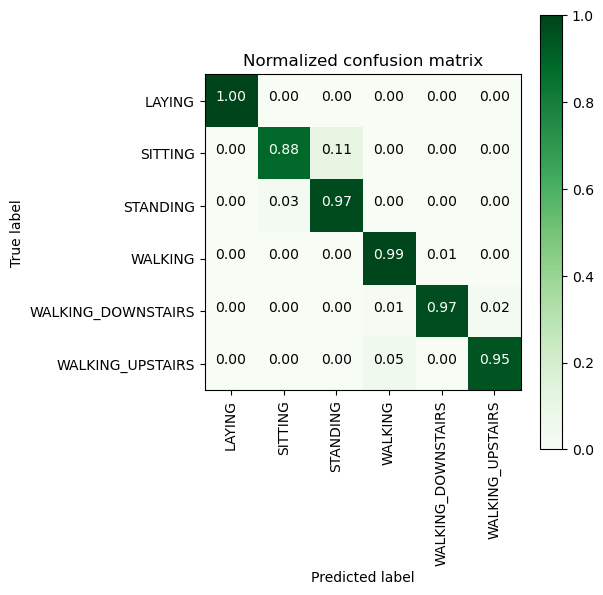

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	SVC(C=100, gamma=0.001)


==> Best parameters:
	Parameters of best estimator : {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9442345620418711


In [11]:
# Start Grid Search

param_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'sigmoid']}

svc_classifier = SVC()
svc_classifier_grid = GridSearchCV(estimator=svc_classifier, param_grid=param_svc, scoring='accuracy', cv=3,verbose=3)
svc_classifier_grid_results = perform_model(svc_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model

print_grid_search_attributes(svc_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is conducted to optimize a SVC classifier. The hyperparameter under consideration is 'C' , 'gamma', 'kernal' which represents the prior probabilities of the classes. Grid search is performed with 3-fold cross-validation.

The best-performing SVC classifier is identified with the following attributes:

##### Best Estimator: SVC(C=100, gamma=0.001)
##### Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
##### Number of Cross-Validation Sets: 3
##### Best Score: 0.9442345620418711 (Average Cross-Validate Score)

### After training, the GaussianNB classifier achieves an accuracy of approximately 96.16% on the test data. 

# 9. Neural Netwrok with Grid Search

training the model..
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=100;, score=0.936 total time=   6.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=100;, score=0.928 total time=   5.9s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=100;, score=0.944 total time=   5.1s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=200;, score=0.945 total time=   7.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=200;, score=0.900 total time=   7.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=200;, score=0.940 total time=  11.0s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=100;, score=0.934 total time=   4.8s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=100;, score=0.917 total time=   5.7s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=100;, score=0.942 total time=   7.3s
[CV 1/3] END 

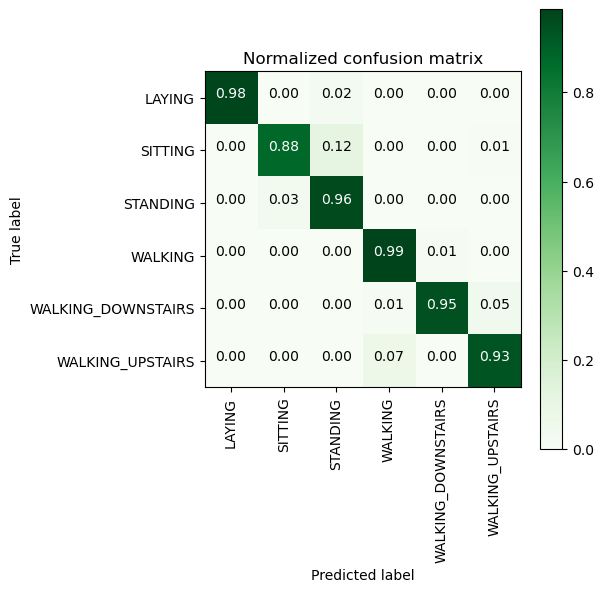

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.88      0.96      0.92       532
           WALKING       0.93      0.99      0.96       496
WALKING_DOWNSTAIRS       0.98      0.95      0.96       420
  WALKING_UPSTAIRS       0.95      0.93      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



==> Best Estimator:
	MLPClassifier(max_iter=100)


==> Best parameters:
	Parameters of best estimator : {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 100}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9360729620285486


In [11]:
# Start Grid Search

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'alpha': [0.0001, 0.001],
    'max_iter': [100, 200]}

mlp_classifier = MLPClassifier()
mlp_classifier_grid = GridSearchCV(mlp_classifier, param_grid=param_grid_mlp, cv=3, verbose=3)
mlp_classifier_grid_results = perform_model(mlp_classifier_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Observe the attributes of the model 

print_grid_search_attributes(mlp_classifier_grid_results['model'])

## Result Summary:

In this code, a grid search is conducted to optimize a Neural Network classifier. The hyperparameter under consideration is 'hidden_layer_sizes' , 'alpha', 'max_iter' which represents the prior probabilities of the classes. Grid search is performed with 3-fold cross-validation.

The best-performing Neural Network classifier is identified with the following attributes:

##### Best Estimator: MLPClassifier(max_iter=100)
##### Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 100}
##### Number of Cross-Validation Sets: 3
##### Best Score: 0.9360729620285486 (Average Cross-Validate Score)

### After training, the GaussianNB classifier achieves an accuracy of approximately 94.77% on the test data. 

===================================================================================================================

# Summary of Business Impact


### After evaluating all the models, we have selected "Accuracy" as the primary performance metric for comparison.


**Equal Importance of Classes:** <br>
Since all classes (activities) in the dataset are equally important for us and have similar consequences when misclassified, accuracy is a valid metric. For example, as one of our golas is to provide general activity recognition for fitness tracking, all activities will be equally valuable.

**Balancing between Precision and Recall:**<br>
Human activity recognition is crucial for various applications, such as healthcare and fitness tracking. Accuracy combines both precision (the ability to correctly recognize specific activities) and recall (the ability to identify all activities accurately), striking a balance that ensures the model's overall effectiveness.

**Relevance to User Experience:** <br>
In this context, achieving high accuracy is essential to deliver a satisfactory user experience. Users expect accurate activity tracking, and a model with high accuracy aligns with this expectation, enhancing user satisfaction and trust.

**Interpretable and Easily Comparable:**<br>
Accuracy is a straightforward and interpretable metric, making it easy to understand and compare model performance. It provides a clear percentage of correctly predicted activities, allowing for straightforward model evaluation and selection.

**Practical Implementation:**<br>
High accuracy is directly relevant to the practical application of human activity recognition. It ensures that the model reliably recognizes activities, which is critical for applications like health monitoring and fitness tracking, where accurate tracking of user activities is essential.

### Model Comparison with Accuracy:

| Model                      | Accuracy |
|----------------------------|---------------------------------|
| AdaBoost                   | 72.34%                          |
| Naive Bayes                | 77.03%                          |
| Decision Tree              | 86.97%                          |
| KNN                        | 91.69%                          |
| Random Forest              | 92.23%                          |
| MLP Classifier             | 94.77%                          |
| XGBoost                    | 95.15%                          |
| SVM                        | 96.16%                          |
| Logistic Regression        | 96.20%                          |


### Model recommendation 

<div class="alert alert-block alert-info">
<p align="center">Based on the provided accuracies, Logistic Regression appears to be the best model for Human Activity Recognition Prediction with an accuracy of 96.20%. This indicates that Logistic Regression correctly identifies human activity 96.20% of the time. While XGBoost and SVM also exhibit high accuracies, Logistic Regression surpasses them by a marginal difference. </p>
</div>

- We evaluated the accuracy of these models using unscaled data, data scaled with both the Min-Max scaler and the Standard scaler methods. Subsequently, we performed a grid search to identify the optimal hyperparameters for model training and to determine accuracy. Our findings indicate that the models achieved the highest accuracy after applying the grid search optimization.

### Logistic Regression 

<div class="alert alert-block alert-info">
<p align="center">We saw in our analysis earlier that it can be hard to classify between SITTING and STANDING activity. The confusion metrics for the Logistic Regression model clearly shows that it could predict the classes with high accuracy, though some error for predicting SITTING & STANDING. </p>
</div>

-**Interpretability:** <br>
Logistic Regression is a relatively simple and interpretable model, allowing users to understand the relationships between input features and predicted outcomes. This interpretability is particularly valuable in Human Activity Recognition, where understanding the factors that influence activity prediction can be crucial for applications like healthcare and fitness tracking.

-**Robustness:** <br>
Logistic Regression is known for its robustness to outliers and noise in the data, which is common in real-world Human Activity Recognition scenarios. This robustness ensures that the model maintains its predictive performance even when faced with imperfect or noisy data.

-**Computational Efficiency:** <br>
Logistic Regression is computationally efficient, making it suitable for real-time applications where predictions need to be made quickly. This efficiency is particularly important in wearable devices and mobile applications that monitor human activity.






